In [ ]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from statistics import stdev
import statsmodels.api as sm
from statsmodels.genmod import families
from scipy.stats import mannwhitneyu, wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multitest import multipletests



In [ ]:
csv_file = '/content/Introspective spatial concepts (new).csv'
data = pd.read_csv(csv_file,delimiter=';', index_col='Metaphors')
data.dropna(inplace=True)
data['Psychotherapy'] = data['Psychotherapy'].astype(float)
data['Podcasts'] = data['Podcasts'].astype(float)
data['Subtitles'] = data['Subtitles'].astype(float)
data.describe()


,Psychotherapy,Podcasts,Subtitles
count,15.000000,15.000000,15.000000
mean,0.003669,0.000690,0.000324
std,0.003304,0.000767,0.000363
min,0.000854,0.000000,0.000000
25%,0.001281,0.000161,0.000141
50%,0.002251,0.000401,0.000212
75%,0.005589,0.001044,0.000317
max,0.012574,0.002167,0.001410


In [ ]:


group1_data = data['Psychotherapy']
group2_data = data['Podcasts']
group3_data = data['Subtitles']


statistic, p_value = stats.kruskal(data['Psychotherapy'], data['Podcasts'], data['Subtitles'])
print("Kruskal-Wallis Test: H =", statistic, ", p =", p_value)

statistic1, p_value1 = mannwhitneyu(group1_data, group2_data, alternative='two-sided')


statistic2, p_value2 = mannwhitneyu(group1_data, group3_data, alternative='two-sided')


statistic3, p_value3 = mannwhitneyu(group2_data, group3_data, alternative='two-sided')



print("Group1 vs. Group2: U =", statistic1, ", p =", p_value1)
print("Group1 vs. Group3: U =", statistic2, ", p =", p_value2)
print("Group2 vs. Group3: U =", statistic3, ", p =", p_value3)
# Holm-Bonferroni Correction
p_values = [p_value1, p_value2, p_value3]
reject, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='holm')

print("Holm-Bonferroni corrected p-values:", corrected_p_values)
print("Holm-Bonferroni corrected p-values:", ['{:0.4f}'.format(p) for p in corrected_p_values])

sd_group1 = group1_data.std()
sd_group2 = group2_data.std()
sd_group3 = group3_data.std()


cohens_d1 = (group1_data.mean() - group2_data.mean()) / (sd_group1 + sd_group2)
cohens_d2 = (group1_data.mean() - group3_data.mean()) / (sd_group1 + sd_group3)
cohens_d3 = (group2_data.mean() - group3_data.mean()) / (sd_group2 + sd_group3)



print("Cohen's d (Group1 vs. Group2):", cohens_d1)
print("Cohen's d (Group1 vs. Group3):", cohens_d2)
print("Cohen's d (Group2 vs. Group3):", cohens_d3)










Kruskal-Wallis Test: H = 23.023957783641155 , p = 1.0009470212914028e-05
Group1 vs. Group2: U = 199.0 , p = 0.0003571249089497308
Group1 vs. Group3: U = 220.0 , p = 8.846860766663477e-06
Group2 vs. Group3: U = 141.0 , p = 0.2444855150548556
Holm-Bonferroni corrected p-values: [7.14249818e-04 2.65405823e-05 2.44485515e-01]
Holm-Bonferroni corrected p-values: ['0.0007', '0.0000', '0.2445']
Cohen's d (Group1 vs. Group2): 0.7314625372653238
Cohen's d (Group1 vs. Group3): 0.9118851071895703
Cohen's d (Group2 vs. Group3): 0.32372769735051377


In [25]:

df = pd.read_csv('/content/Introspective spatial concepts (new).csv',delimiter=';', index_col='Metaphors')
df.head()
data.dropna(inplace=True)
data['Psychotherapy'] = data['Psychotherapy'].astype(float)
data['Podcasts'] = data['Podcasts'].astype(float)
data['Subtitles'] = data['Subtitles'].astype(float)
data.describe()

,Psychotherapy,Podcasts,Subtitles
count,15.000000,15.000000,15.000000
mean,0.003669,0.000690,0.000324
std,0.003304,0.000767,0.000363
min,0.000854,0.000000,0.000000
25%,0.001281,0.000161,0.000141
50%,0.002251,0.000401,0.000212
75%,0.005589,0.001044,0.000317
max,0.012574,0.002167,0.001410


# Uus jaotis

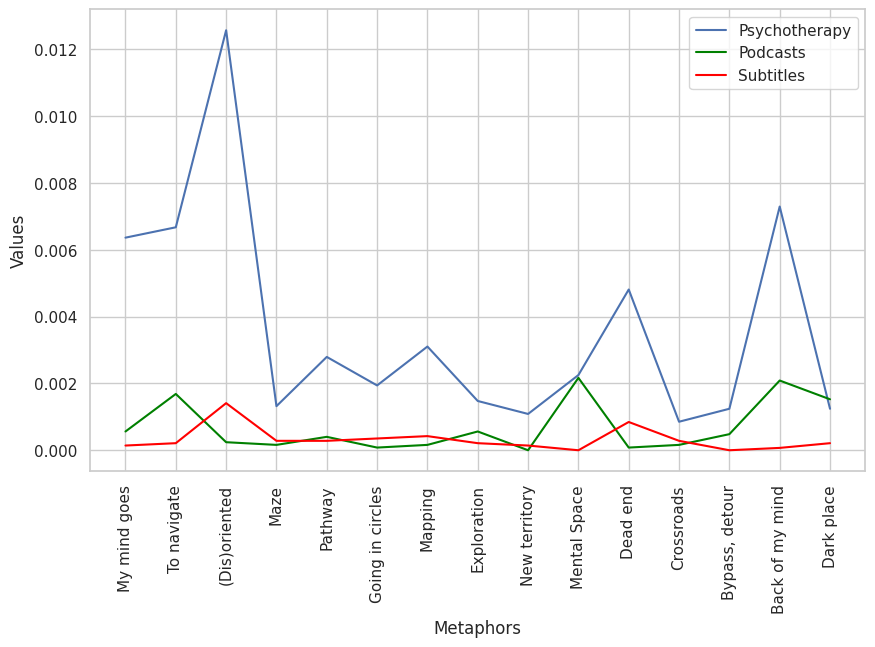

In [26]:
# Set font to Arial or Segoe UI
sns.set(font='Arial')

# Set the font size within the specified range (7-11 pt)
sns.set_context("notebook", font_scale=0.8)

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
sns.set_theme(style="whitegrid")

# Plot the lines for each 'Group' column
sns.lineplot(data=df['Psychotherapy'], label='Psychotherapy')
sns.lineplot(data=df['Podcasts'], label='Podcasts', color='green')
sns.lineplot(data=df['Subtitles'], label='Subtitles', color='red')

# Set plot labels and title
plt.xlabel('Metaphors')
plt.ylabel('Values')

# Set consistent font size for ticks
plt.xticks(rotation='vertical', fontsize=11)
plt.yticks(fontsize=11)

# Display the legend
plt.legend(fontsize=11)

# Show the plot
plt.show()